# Machine Learning of Ising Model

**I wrote the Ising model program code based on Professor Akio Tomiya's lecture.**

**References**
- Carrasquilla, J., & Melko, R. G. Machine learning phases of matter. _nature physics_. 2017; 13(5), 431-434. [Machine learning phases of matter](https://doi.org/10.1038/nphys4035)
- Carrasquilla, J., & Melko, R. G. Machine learning phases of matter. _nature physics_. 2017; Supplementary Information. [Supplementary Information](https://doi.org/10.1038/nphys4035)

In [1]:
# lattice size
Lsize = 24

In [2]:
# 2d Ising model
import math
import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm. notebook import tqdm

# taking into account the Periodic Boundary Conditions
def xup(x):
  x+=1
  if x>=L[0]:
    x-=L[0]
  return x
def yup(y):
  y+=1
  if y>=L[1]:
    y-=L[1]
  return y
def xdn(x):
  x-=1
  if x<0:
    x+=L[0]
  return x
def ydn(y):
  y-=1
  if y<0:
    y+=L[1]
  return y

# sum the vertical and horizontal spins of a point (x,y)
def spin_sum(sc,x,y):
  h=0
  h+=sc[xup(x)][y]
  h+=sc[xdn(x)][y]
  h+=sc[x][yup(y)]
  h+=sc[x][ydn(y)]
  return h

# perform a Heat Bath Algorithm at a point (x,y)
def heatbath_local(beta,hz,sc,x,y):
  h = spin_sum(sc,x,y)-hz
  # Calculate the probability that this site will next be s=+1
  p = math.exp(beta*h)/(math.exp(beta*h) + math.exp(-beta*h))
  r = random.random()
  # Determine 's' randomly based on probability
  if r < p:
    sc[x][y]=1
  else:
    sc[x][y]=-1
  return sc

# perform a Heat Bath Algorithm for all (x,y)
def heatbath(beta,hz,sc):
  xlist = list(range(L[0]) )
  random.shuffle(xlist)
  ylist = list(range(L[1]) )
  random.shuffle(ylist)
  for x in xlist:
    for y in ylist:
      sc = heatbath_local(beta,hz,sc,x,y)
  return sc

# calculate the magnetic susceptibility.
def magnetization (sc):
  m=0
  for x in range(L[0]):
    for y in range(L[1]):
      m+=sc[x][y]
  return m/(L[0]*L[1])

# set the initial configuration of the Monte Carlo method.
# function to set the initial state where all spins are +1 (This is a situation for T=0).
def init_conf_cold():
  sc = [[1]*L[1] for i in range(L[0])]
  return sc

def init_conf(init="cold"):
  sc = init_conf_cold()
  if init=="cold":
    return sc
  for x in range(L[0]):
    for y in range(L[1]):
      r = random.random()
      if r<0.5: # 50% up spins, 50% down spins
        sc[x][y]=1
      else:
        sc[x][y]=-1
  return sc


**Run a simulation using the 2D Ising model and plot the time evolution of its magnetisation.**

  0%|          | 0/10000 [00:00<?, ?it/s]

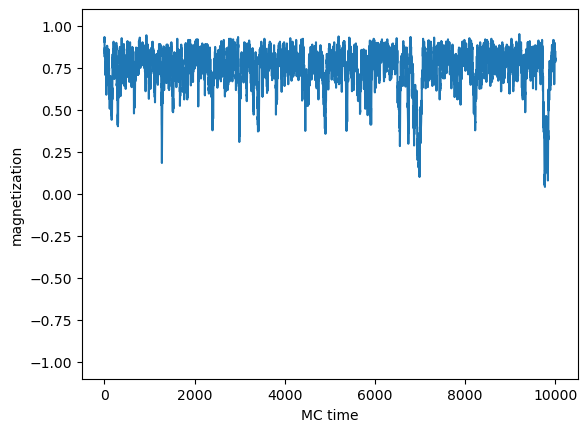

In [3]:
L = [Lsize,Lsize]
beta = 0.440687
hz=-0.01
Nsweep = 10**4 # number of Monte Carlo sweeps
sc = init_conf()
mctime=[]; # list to record Monte Carlo time.
mag_hist=[] # list to record the magnetisation at each sweep.
for isweep in tqdm(range(Nsweep)):
  sc = heatbath(beta,hz,sc)
  mag=magnetization(sc)
  mctime.append(isweep)
  mag_hist.append(mag)
plt.plot(mctime,mag_hist)
plt.ylim([-1.1,1.1])
plt.xlabel("MC time")
plt.ylabel("magnetization")
plt.show()

In [4]:
N_dis=10**3 # number of samples to throw away
N_trj=10**4+N_dis # total number of updates
N_sav=100 # save coordination every 10 times.
prm_list = [
#beta, #of_trj, #of_discard, #file_name, #save_every
  [0.90, N_trj, N_dis,f"conf/L{Lsize}b090_", N_sav],
  [0.85, N_trj, N_dis,f"conf/L{Lsize}b085_", N_sav],
  [0.80, N_trj, N_dis,f"conf/L{Lsize}b080_", N_sav],
  [0.70, N_trj, N_dis,f"conf/L{Lsize}b070_", N_sav],
  [0.65, N_trj, N_dis,f"conf/L{Lsize}b065_", N_sav],
  [0.60, N_trj, N_dis,f"conf/L{Lsize}b060_", N_sav],
  [0.55, N_trj, N_dis,f"conf/L{Lsize}b055_", N_sav],
  [0.50, N_trj, N_dis,f"conf/L{Lsize}b050_", N_sav],
  [0.47, N_trj, N_dis,f"conf/L{Lsize}b047_", N_sav],
  [0.42, N_trj, N_dis,f"conf/L{Lsize}b042_", N_sav],
  [0.40, N_trj, N_dis,f"conf/L{Lsize}b040_", N_sav],
  [0.35, N_trj, N_dis,f"conf/L{Lsize}b035_", N_sav],
  [0.30, N_trj, N_dis,f"conf/L{Lsize}b030_", N_sav],
  [0.25, N_trj, N_dis,f"conf/L{Lsize}b025_", N_sav],
  [0.20, N_trj, N_dis,f"conf/L{Lsize}b020_", N_sav],
  [0.15, N_trj, N_dis,f"conf/L{Lsize}b015_", N_sav],
  [0.10, N_trj, N_dis,f"conf/L{Lsize}b010_", N_sav],
  [0.05, N_trj, N_dis,f"conf/L{Lsize}b005_", N_sav],
  [0.00, N_trj, N_dis,f"conf/L{Lsize}b000_", N_sav]
  ]

beta=0.9 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.85 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.8 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.7 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.65 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.6 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.55 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.5 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.47 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.42 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.4 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.35 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.3 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.25 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.2 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.15 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.1 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.05 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100

beta=0.0 11000


  0%|          | 0/11000 [00:00<?, ?it/s]

100



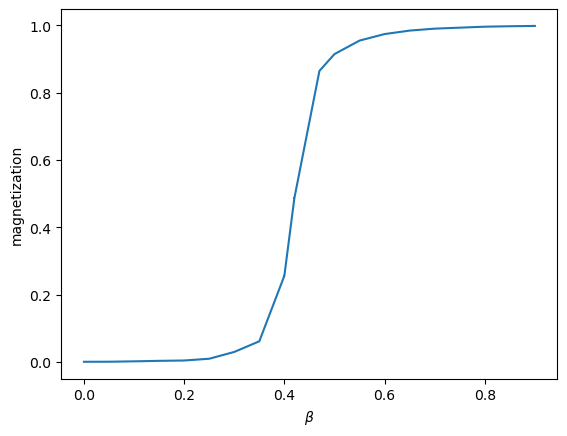

In [5]:
# if there is no conf directory, create one.
import os
os.makedirs("conf", exist_ok = True)
#
L = [Lsize,Lsize] # set the lattice size.
hz = -0.01 # add very weak magnetic field to see phase transitions

nprm=len(prm_list) # find the length of the parameter list.
betas = []
mags = []
mags_er = []
#
random.seed(12345)
sc = init_conf()
# read out the parameters for each beta and make the configuration.
for ibeta in range(nprm):
  beta = prm_list[ibeta][0]
  Nsweep = prm_list[ibeta][1]
  Ndiscard = prm_list[ibeta][2]
  fname = prm_list[ibeta][3]
  save_every = prm_list[ibeta][4]
  conf_cnt = 0
  #
  print(f"beta={beta} {Nsweep}")
  mag_hist=[]
  # create configuration using the Heat Bath Algorithm.
  for isweep in tqdm(range(Nsweep)):
    sc = heatbath(beta,hz,sc)
    mag=magnetization(sc)
    mag_hist.append(mag)
    if (isweep%save_every == 0)&(isweep>=Ndiscard):
      scn = np.array(sc)
      np.save(f"{fname}{conf_cnt}",scn)
      conf_cnt+=1
  print(conf_cnt)
  #
  print("")
  mag_hist=np.array(mag_hist[Ndiscard:])
  mag = np.mean(mag_hist)
  mag_er = np.std(mag_hist)/np.sqrt(len(mag_hist)-1) #
  betas.append(beta)
  mags.append(mag)
  mags_er.append(mag_er)
  #
plt.xlabel(r"$\beta$")
plt.ylabel("magnetization")
plt.errorbar(betas,mags,yerr=mags_er)
plt.show()


**The graph shows low temperatures on the right and high temperatures on the left because beta is the inverse of temperature.**

# Data Preprocessing

In [6]:
nconf = 100 # the number of configurations at each beta.
betacr = 0.440686 # phase transition critical temperature of the square Ising model.
#
data = []
labels = []
betas = []
nprm=len(prm_list)
for ibeta in range(nprm):
  beta = prm_list[ibeta][0]
  fname = prm_list[ibeta][3]
  for itrj in range(nconf):
    npsc = np.load(f"{fname}{itrj}.npy")
    data.append(npsc)
    if beta > betacr:
      labels.append([1,0]) # One-hot vector of low-temperature phases
    else:
      labels.append([0,1]) # One-hot vector of high-temperature phases
    betas.append(beta)
data = np.array(data)
labels = np.array(labels)

# splitting training and validation data.
train_data=data[0::2]
train_labels=labels[0::2]
train_betas=betas[0::2]
#
val_data=data[1::2]
val_labels=labels[1::2]
val_betas=betas[1::2]

In [7]:
print("train_data.shape = ", train_data.shape)
print("val_data.shape = ", val_data.shape)

train_data.shape =  (950, 24, 24)
val_data.shape =  (950, 24, 24)


In [ ]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2024-06-24 18:37:32.496960: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [29]:
# Define the Convolutional Newral Network(CNN)
tf.random.set_seed(123456)
model_CNN = keras.Sequential([
keras.layers.Conv2D(filters = 1, kernel_size=(4, 4),activation='relu', input_shape=(Lsize, Lsize, 1)),
keras.layers.Flatten(),keras.layers.Dense(100, activation='relu'),
keras.layers.Dense(2, activation='softmax') ])

**The results depend on the seed.**

In [30]:
model_CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Fit the data to the Network**

In [31]:
model_CNN.fit(train_data, train_labels, epochs=10,validation_split=0.2)

Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7508 - loss: 0.5884 - val_accuracy: 1.0000 - val_loss: 4.3620e-04
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9244 - loss: 0.3815 - val_accuracy: 1.0000 - val_loss: 0.0046
Epoch 3/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9972 - loss: 0.2860 - val_accuracy: 1.0000 - val_loss: 0.0023
Epoch 4/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9977 - loss: 0.2007 - val_accuracy: 1.0000 - val_loss: 6.0394e-04
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9984 - loss: 0.1301 - val_accuracy: 1.0000 - val_loss: 2.3757e-04
Epoch 6/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9989 - loss: 0.0817 - val_accuracy: 1.0000 - val_loss: 1.1516e-04
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0525 - val_accuracy: 1.0000 - val_loss: 6.5407e-05
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0353 - val_accuracy

**Evaluate the model 'model_CNN' using the validation dataset 'val_data' and plot the results**

0.9 0.97746414 0.022535782
0.85 0.9772292 0.022770815
0.8 0.9772007 0.022799205
0.7 0.97690713 0.023092799
0.65 0.9739489 0.026051022
0.6 0.9699261 0.030073727
0.55 0.961495 0.038505062
0.5 0.939288 0.06071185
0.47 0.865131 0.13486908
0.42 0.30936128 0.69063866
0.4 0.07887928 0.9211207
0.35 0.0023734567 0.9976264
0.3 0.00019143593 0.9998085
0.25 0.00017841194 0.99982154
0.2 0.00014304629 0.9998569
0.15 6.236972e-05 0.9999376
0.1 6.4082105e-06 0.9999935
0.05 1.9487634e-05 0.9999804
0.0 3.063754e-05 0.9999693


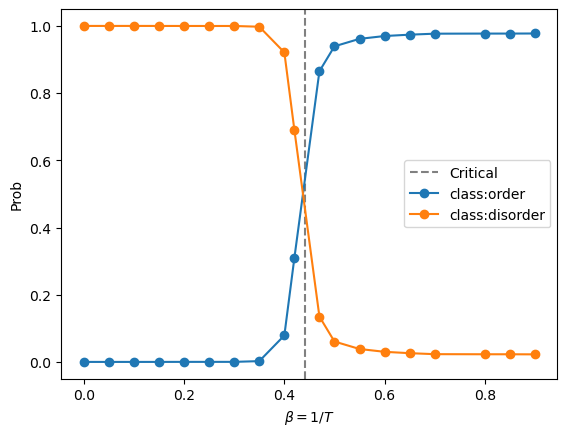

In [32]:
xs=[]
y1s=[]
y2s=[]
Ndatamax = 950 # total number of data for verification
Nsameclass = 50 # number of validation data configurations in the same beta.
for ii in range(0,Ndatamax,Nsameclass):
  res = model_CNN(val_data[ii:ii+Nsameclass])
  x = val_betas[ii]
  y1= np.mean(res.numpy().T[0] ) # the mean probability of class 0 (low temperature phase)
  y2=np.mean(res.numpy().T[1] ) # the mean probability of class 1 (high temperature phase).
  xs.append( x )
  y1s.append( y1 )
  y2s.append( y2 )
  print(x,y1,y2)
plt.axvline(x=0.440686, ymin=0, ymax=1, ls="dashed",color="gray",label="Critical")
plt.plot(xs,y1s,label="class:order",marker="o")
plt.plot(xs,y2s,label="class:disorder",marker="o")
plt.legend()
plt.xlabel(r"$\beta=1/T$")
plt.ylabel(r"Prob")
plt.show()

**It can be seen that a magnetic (order) and non-magnetic (disorder) class division was established around the phase transition temperature.**